In [1]:
from logging import currentframe

import pandas as pd
import matplotlib.pyplot as plt

In [112]:
results_path: str = '/Users/nicolahorst/Documents/GitHub/clem-project_playpen/benchmark_results/clembench/final_models/results_500_max_new_tokens_tmw.csv'
df_results = pd.read_csv(results_path)
axis_to_keep_in_domain: list = ['Unnamed: 0','imagegame, % Played', 'imagegame, Quality Score', 'privateshared, % Played', 'privateshared, Quality Score', 'referencegame, % Played', 'referencegame, Quality Score', 'taboo, % Played', 'taboo, Quality Score', 'wordle, % Played', 'wordle, Quality Score', 'wordle_withclue, % Played', 'wordle_withclue, Quality Score', 'wordle_withcritic, % Played', 'wordle_withcritic, Quality Score',]

axis_to_keep_out_of_domain: list = ['Unnamed: 0','adventuregame, % Played', 'adventuregame, Quality Score', 'codenames, % Played', 'codenames, Quality Score', 'textmapworld, % Played', 'textmapworld, Quality Score', 'textmapworld_specificroom, % Played', 'textmapworld_specificroom, Quality Score', 'textmapworld_graphreasoning, % Played', 'textmapworld_graphreasoning, Quality Score', 'matchit_ascii, % Played', 'matchit_ascii, Quality Score', 'guesswhat, % Played', 'guesswhat, Quality Score',]

columns_played = [a for a in axis_to_keep_in_domain if '%' in a or a == 'Unnamed: 0']
columns_quality = [a for a in axis_to_keep_in_domain if '%' not in a]

columns_played_ood = [a for a in axis_to_keep_out_of_domain if '%' in a or a == 'Unnamed: 0']
columns_quality_ood = [a for a in axis_to_keep_out_of_domain if '%' not in a]
assert len(columns_played) == len(columns_quality)

In [113]:
llama_8B_base_model = "Unsloth-meta-llama-3.1-4bit-plain-t0.0--Unsloth-meta-llama-3.1-4bit-plain-t0.0"
llama_8B_final_model = 'llama3.1-8B-sft-e1-DFINAL_0.7K-steps-t0.0--llama3.1-8B-sft-e1-DFINAL_0.7K-steps-t0.0'

mistral_base_model = "Unsloth-Mistral-Small-24B-Instruct-2501-t0.0--Unsloth-Mistral-Small-24B-Instruct-2501-t0.0"
mistral_final_model = "Mistral-small-2501-DFINAL_0.6K-steps-t0.0--Mistral-small-2501-DFINAL_0.6K-steps-t0.0"

llama_70B_base_model = "Unsloth-meta-llama-3.1-70B-bnb-4bit-t0.0--Unsloth-meta-llama-3.1-70B-bnb-4bit-t0.0"
llama_70B_final_model = 'llama3.1-70B-sft-e1-DFINAL_0.6K-steps-t0.0--llama3.1-70B-sft-e1-DFINAL_0.6K-steps-t0.0'

models_to_consider: list = [llama_8B_base_model, llama_8B_final_model, mistral_final_model, mistral_base_model, llama_70B_base_model, llama_70B_final_model]
df_selected = df_results[df_results['Unnamed: 0'].isin(models_to_consider)]

In [115]:
df_played = df_selected[columns_played]
df_quality = df_selected[columns_quality]

df_played_ood = df_selected[columns_played_ood]
df_quality_ood = df_selected[columns_quality_ood]

In [116]:
llama_base_played = df_played[df_played['Unnamed: 0'] == llama_8B_base_model].drop('Unnamed: 0', axis=1).fillna(0)
llama_final_played = df_played[df_quality['Unnamed: 0'] == llama_8B_final_model].drop('Unnamed: 0', axis=1).fillna(0)

llama_base_quality = df_quality[df_quality['Unnamed: 0'] == llama_8B_base_model].drop('Unnamed: 0', axis=1).fillna(0)
llama_final_quality = df_quality[df_quality['Unnamed: 0'] == llama_8B_final_model].drop('Unnamed: 0', axis=1).fillna(0)

llama_base_played_ood = df_played_ood[df_played_ood['Unnamed: 0'] == llama_8B_base_model].drop('Unnamed: 0', axis=1).fillna(0)
llama_final_played_ood = df_played_ood[df_quality_ood['Unnamed: 0'] == llama_8B_final_model].drop('Unnamed: 0', axis=1).fillna(0)

llama_base_quality_ood = df_quality_ood[df_quality_ood['Unnamed: 0'] == llama_8B_base_model].drop('Unnamed: 0', axis=1).fillna(0)
llama_final_quality_ood = df_quality_ood[df_quality_ood['Unnamed: 0'] == llama_8B_final_model].drop('Unnamed: 0', axis=1).fillna(0)

# mistral small
mistral_base_played = df_played[df_played['Unnamed: 0'] == mistral_base_model].drop('Unnamed: 0', axis=1).fillna(0)
mistral_final_played = df_played[df_quality['Unnamed: 0'] == mistral_final_model].drop('Unnamed: 0', axis=1).fillna(0)

mistral_base_quality = df_quality[df_quality['Unnamed: 0'] == mistral_base_model].drop('Unnamed: 0', axis=1).fillna(0)
mistral_final_quality = df_quality[df_quality['Unnamed: 0'] == mistral_final_model].drop('Unnamed: 0', axis=1).fillna(0)

mistral_base_played_ood = df_played_ood[df_played_ood['Unnamed: 0'] == mistral_base_model].drop('Unnamed: 0', axis=1).fillna(0)
mistral_final_played_ood = df_played_ood[df_quality_ood['Unnamed: 0'] == mistral_final_model].drop('Unnamed: 0', axis=1).fillna(0)

mistral_base_quality_ood = df_quality_ood[df_quality_ood['Unnamed: 0'] == mistral_base_model].drop('Unnamed: 0', axis=1).fillna(0)
mistral_final_quality_ood = df_quality_ood[df_quality_ood['Unnamed: 0'] == mistral_final_model].drop('Unnamed: 0', axis=1).fillna(0)

# llama-70B
llama_70B_base_played = df_played[df_played['Unnamed: 0'] == llama_70B_base_model].drop('Unnamed: 0', axis=1).fillna(0)
llama_70B_final_played = df_played[df_quality['Unnamed: 0'] == llama_70B_final_model].drop('Unnamed: 0', axis=1).fillna(0)

llama_70B_base_quality = df_quality[df_quality['Unnamed: 0'] == llama_70B_base_model].drop('Unnamed: 0', axis=1).fillna(0)
llama_70B_final_quality = df_quality[df_quality['Unnamed: 0'] ==llama_70B_final_model].drop('Unnamed: 0', axis=1).fillna(0)

llama_70B_base_played_ood = df_played_ood[df_played_ood['Unnamed: 0'] == llama_70B_base_model].drop('Unnamed: 0', axis=1).fillna(0)
llama_70B_final_played_ood = df_played_ood[df_quality_ood['Unnamed: 0'] == llama_70B_final_model].drop('Unnamed: 0', axis=1).fillna(0)

llama_70B_base_quality_ood = df_quality_ood[df_quality_ood['Unnamed: 0'] == llama_70B_base_model].drop('Unnamed: 0', axis=1).fillna(0)
llama_70B_final_quality_ood = df_quality_ood[df_quality_ood['Unnamed: 0'] ==llama_70B_final_model].drop('Unnamed: 0', axis=1).fillna(0)

In [137]:
all_data = [
    # llama 8B
    [list(llama_base_played.iloc[0]),
     list(llama_final_played.iloc[0]),

    list(llama_base_quality.iloc[0]),
     list(llama_final_quality.iloc[0]),
    [(a * b )/ 100 for a, b in zip (list(llama_base_played.iloc[0]), list(llama_base_quality.iloc[0]))],
    [(a * b )/ 100 for a, b in zip (list(llama_final_played.iloc[0]), list(llama_final_quality.iloc[0]))]],

    # llama 8B OOD
    [list(llama_base_played_ood.iloc[0]),
     list(llama_final_played_ood.iloc[0]),
     list(llama_base_quality_ood.iloc[0]),
     list(llama_final_quality_ood.iloc[0]),
     [(a * b )/ 100 for a, b in zip (list(llama_base_played_ood.iloc[0]), list(llama_base_quality_ood.iloc[0]))],
     [(a * b )/ 100 for a, b in zip (list(llama_final_played_ood.iloc[0]), list(llama_final_quality_ood.iloc[0]))]],

    # Mistral Small
    [list(mistral_base_played.iloc[0]),
     list(mistral_final_played.iloc[0]),
     list(mistral_base_quality.iloc[0]),
     list(mistral_final_quality.iloc[0]),
     [(a * b )/ 100 for a, b in zip (list(mistral_base_played.iloc[0]), list(mistral_base_quality.iloc[0]))],
     [(a * b )/ 100 for a, b in zip (list(mistral_final_played.iloc[0]), list(mistral_final_quality.iloc[0]))]],

    # Mistral Small OOD
    [list(mistral_base_played_ood.iloc[0]),
     list(mistral_final_played_ood.iloc[0]),
     list(mistral_base_quality_ood.iloc[0]),
     list(mistral_final_quality_ood.iloc[0]),
     [(a * b )/ 100 for a, b in zip (list(mistral_base_played_ood.iloc[0]), list(mistral_base_quality_ood.iloc[0]))],
     [(a * b )/ 100 for a, b in zip (list(mistral_final_played_ood.iloc[0]), list(mistral_final_quality_ood.iloc[0]))]],

    # Llama-70B
    [list(llama_70B_base_played.iloc[0]),
     list(llama_70B_final_played.iloc[0]),
     list(llama_70B_base_quality.iloc[0]),
     list(llama_70B_final_quality.iloc[0]),
     [(a * b )/ 100 for a, b in zip (list(llama_70B_base_played.iloc[0]), list(llama_70B_base_quality.iloc[0]))],
     [(a * b )/ 100 for a, b in zip (list(llama_70B_final_played.iloc[0]), list(llama_70B_final_quality.iloc[0]))]],

    [list(llama_70B_base_played_ood.iloc[0]),
     list(llama_70B_final_played_ood.iloc[0]),
     list(llama_70B_base_quality_ood.iloc[0]),
     list(llama_70B_final_quality_ood.iloc[0]),
     [(a * b )/ 100 for a, b in zip (list(llama_70B_base_played_ood.iloc[0]), list(llama_70B_base_quality_ood.iloc[0]))],
     [(a * b )/ 100 for a, b in zip (list(llama_70B_final_played_ood.iloc[0]), list(llama_70B_final_quality_ood.iloc[0]))]],
]

group_names = ['Baseline Played', 'Final Played', 'Baseline Quality', 'Final Quality', "Base Clemscore", "Final Clemscore"]
all_colors = [['#8B0000', '#0000FF', '#8B0000', '#0000FF', '#8B0000','#0000FF'], ['#8B0000', '#0000FF', '#8B0000', '#0000FF', '#8B0000','#0000FF'], ['#8B0000', '#0000FF', '#8B0000', '#0000FF', '#8B0000','#0000FF'], ]
line_styles = [":", ":", "--", "--", "-", "-"]
alphas = [0.5, 0.5, 0.5, 0.5, 1, 1]
fill_alpha = [0.1, 0.1, 0.1, 0.1, 0.25, 0.25,]
all_titles = [['In Domain Performance Llama-8B', 'Out-of-Domain Performance Llama-8B'], ['In Domain Performance Mistral Small', 'Out-of-Domain Performance Mistral Small'], ['In Domain Performance Llama-70B', 'Out-of-Domain Performance Llama-70B']]
labels = [
    [l.split(",")[0] for l in llama_70B_final_played.columns],
    [l.split(",")[0] for l in llama_70B_final_played_ood.columns],
]

[[<PolarAxes: > <PolarAxes: >]
 [<PolarAxes: > <PolarAxes: >]
 [<PolarAxes: > <PolarAxes: >]]
0 0
0 1
1 0
1 1
2 0
2 1


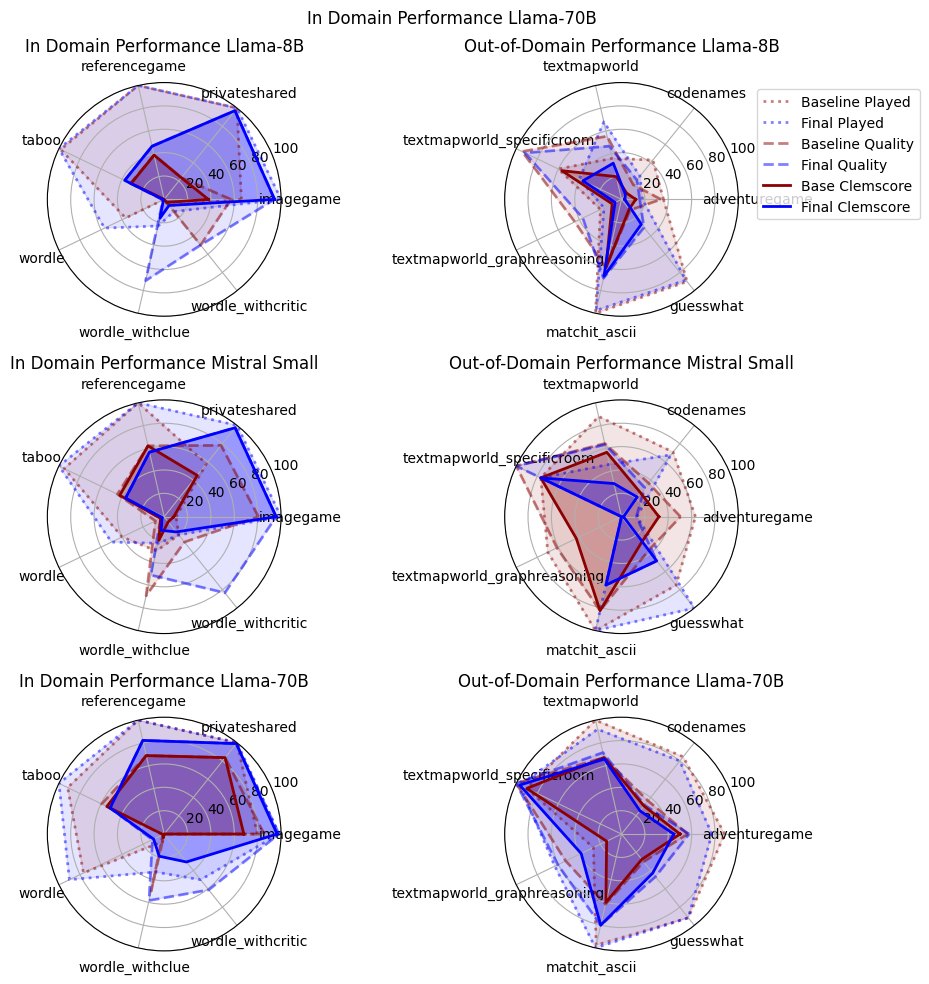

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy data for demonstration (replace with your actual data)
num_vars = 7
# Labels for the axes

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, axs = plt.subplots(3, 2, figsize=(10, 10), subplot_kw=dict(polar=True))
print(axs)
curr_index = 0
for i, axx in enumerate(axs):
    for t, ax in enumerate(axx):
        print(i, t)
        data = all_data[curr_index]
        titles = all_titles[i]
        colors = all_colors[i]
        for idx, values in enumerate(data):
            values = values + values[:1]  # Complete the loop
            ax.plot(angles, values, color=colors[idx], linewidth=2, label=group_names[idx],
                    linestyle=line_styles[idx], alpha=alphas[idx])
            ax.fill(angles, values, color=colors[idx], alpha=fill_alpha[idx])
        ax.set_thetagrids(np.degrees(angles[:-1]), labels[t])
        ax.set_ylim(0, max(max(row) for row in data))
        ax.set_title(titles[t])
        curr_index += 1

# Add legend to the right of the second subplot only
axs[0][1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Add a main title
fig.suptitle(titles[0])

plt.tight_layout()
plt.show()
fig.savefig("../../plots/final_plots/ii_and_out_of_domain_game_scores.svg", format="svg")
